Digit detection

In [2]:
import numpy as np

In [7]:
from sklearn.datasets import load_digits

load_digit = load_digits()

x = load_digit.data
y = load_digit.target

x = np.array(x)
y = np.array(y)


Metric Calculator function

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test )

    precision_test = precision_score(y_true=y_test, y_pred= y_pred_test, average='micro') 

    recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='micro')

    print( ' acc_train = ', acc_train )
    print( ' acc_test = ', acc_test)
    print( ' precision_test = ', precision_test)
    print( 'recall_test = ', recall)

    return acc_train, acc_test, precision_test, recall

Prepocessing

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x , y , test_size=0.25)


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=15)

In [54]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)


In [55]:
acc_train_knn, acc_test_knn, pre_knn, recall_knn = calculate(Y_train, Y_test, pred_train, pred_test)

 acc_train =  0.9836674090571641
 acc_test =  0.9688888888888889
 precision_test =  0.9688888888888889
recall_test =  0.9688888888888889


Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50 , min_samples_split=15)
rf.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=15, n_estimators=50)

In [59]:
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [60]:
acc_train_rf, acc_test_rf, pre_rf, recall_rf = calculate(Y_train, Y_test, pred_train_rf, pred_test_rf)

 acc_train =  0.9970304380103935
 acc_test =  0.9622222222222222
 precision_test =  0.9622222222222222
recall_test =  0.9622222222222222


SVM

In [61]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', degree=3, gamma='scale')
svc.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [62]:
pred_train_svc = svc.predict(X_train)
pred_test_svc = svc.predict(X_test)

In [63]:
acc_train_svc, acc_test_svc, pre_svc, recall_svc = calculate(Y_train, Y_test, pred_train_svc, pred_test_svc)

 acc_train =  0.9049740163325909
 acc_test =  0.9066666666666666
 precision_test =  0.9066666666666666
recall_test =  0.9066666666666666


ANN

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=512 , activation='identity' , solver='lbfgs')
mlp.fit(X_train, Y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=512, solver='lbfgs')

In [66]:
pred_train_mlp = mlp.predict(X_train)
pred_test_mlp = mlp.predict(X_test)

In [67]:
acc_train_mlp, acc_test_mlp, pre_mlp, recall_mlp = calculate(Y_train, Y_test, pred_train_mlp, pred_test_mlp)

 acc_train =  1.0
 acc_test =  0.9488888888888889
 precision_test =  0.9488888888888889
recall_test =  0.9488888888888889


Comparison

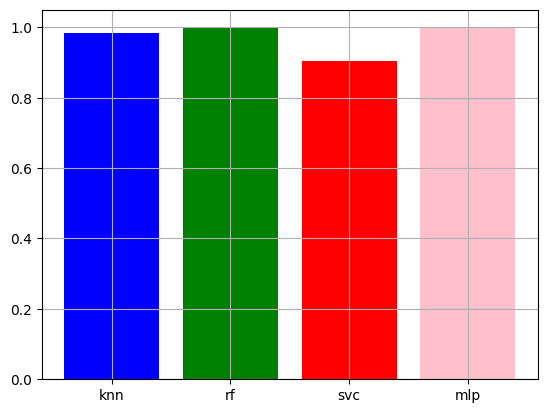

In [70]:
import matplotlib.pyplot as plt

acc_train = [ acc_train_knn, acc_train_rf , acc_train_svc , acc_train_mlp ]
title = ['knn' , 'rf' , 'svc' , 'mlp' ]
colors = [ 'blue' , 'green' , 'red' , 'pink' ]
plt.bar(title , acc_train , color= colors)
plt.grid()
plt.show()

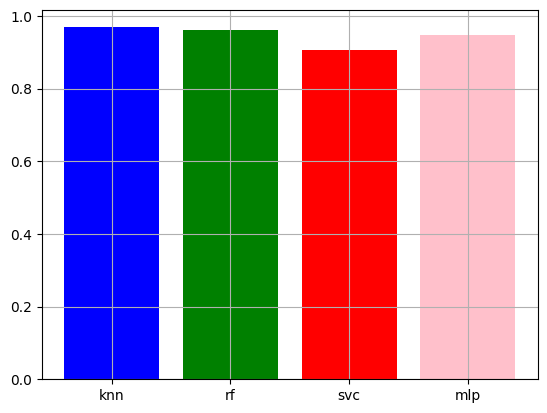

In [71]:
acc_test = [ acc_test_knn, acc_test_rf , acc_test_svc , acc_test_mlp ]
title = ['knn' , 'rf' , 'svc' , 'mlp' ]
colors = [ 'blue' , 'green' , 'red' , 'pink' ]
plt.bar(title , acc_test , color= colors)
plt.grid()
plt.show()

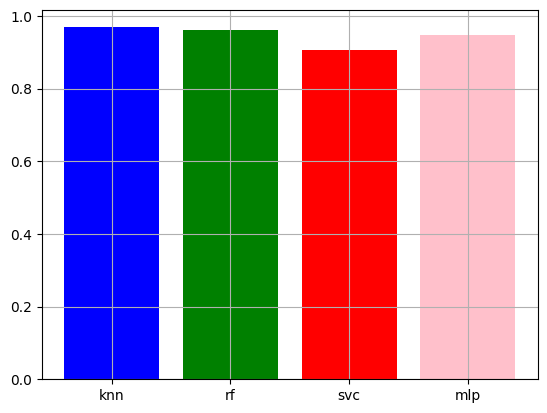

In [72]:
pre_test = [ pre_knn, pre_rf , pre_svc , pre_mlp ]
title = ['knn' , 'rf' , 'svc' , 'mlp' ]
colors = [ 'blue' , 'green' , 'red' , 'pink' ]
plt.bar(title , pre_test , color= colors)
plt.grid()
plt.show()

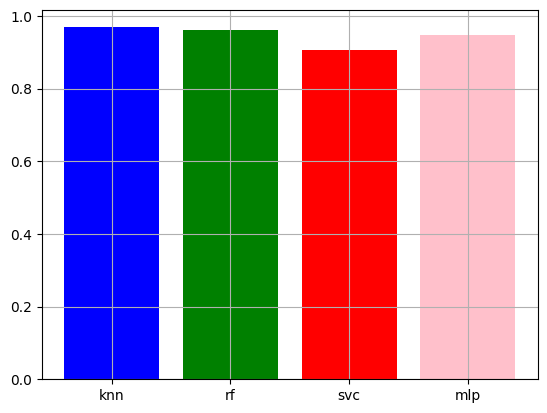

In [73]:
recall_test = [ recall_knn, recall_rf , recall_svc , recall_mlp ]
title = ['knn' , 'rf' , 'svc' , 'mlp' ]
colors = [ 'blue' , 'green' , 'red' , 'pink' ]
plt.bar(title , recall_test , color= colors)
plt.grid()
plt.show()